In [279]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline

In [280]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [281]:
# Read your api key environment variable

api_key = os.getenv("news_api")

In [282]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [317]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy"
)

# Show the total number of news
bitcoin_news_en["totalResults"]


3602

In [318]:
# Fetch the Ethereum news articles
# Fetch the Bitcoin news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)

# Show the total number of news
ethereum_news_en["totalResults"]

967

In [319]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
# Reorder DataFrame columns
cols = [ "compound","negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
1,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
2,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
3,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...


In [320]:
# Create the ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
# Reorder DataFrame columns
cols = [ "compound","negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.000,0.0,1.00,0.00,Editor’s note:Andreessen HorowitzsCrypto Start...
1,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
2,0.000,0.0,1.00,0.00,Editors note:Andreessen Horowitzs Crypto Start...
3,0.000,0.0,1.00,0.00,For developers looking to quickly build identi...
4,0.000,0.0,1.00,0.00,"Akron, Ohio, the hometown of LeBron James and ..."


In [321]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.310145,0.014100,0.918400,0.067400
std,0.319985,0.036248,0.041378,0.037293
min,-0.346400,0.000000,0.819000,0.000000
25%,0.000000,0.000000,0.910000,0.045000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.507000,0.134000,1.000000,0.090000


In [322]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.127271,0.027235,0.913765,0.058941
std,0.425577,0.056784,0.093999,0.081450
min,-0.670500,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.882000,0.000000
50%,0.000000,0.000000,0.910000,0.057000
75%,0.507000,0.000000,1.000000,0.090000
max,0.919800,0.184000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with 0.067400

Q: Which coin had the highest compound score?

A: Bitcoin with 0.310145

Q. Which coin had the highest positive score?

A: Ethereum with 0.335000

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [323]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk


In [324]:
# Expand the default stopwords list if necessary
nltk.download("punkt")
nltk.download('stopwords')
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to /Users/aljohara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aljohara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [325]:
#nltk.download("punkt")

sw = set(stopwords.words('english'))|set(punctuation)
sw_addon = {'then', 'example', 'another'}
sw = sw.union(sw_addon)

In [326]:
# Complete the tokenizer function
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
   


"""Tokenizes text."""
def tokenizer(text):
    
    regex = re.compile("[^a-zA-Z ]")
     # Remove the punctuation
    re_clean = regex.sub(' ', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    # Convert the words to lowercase
   
    # Remove the stop words
    words = [word.lower() for word in words if word.lower() not in sw]
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aljohara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [327]:
# Create a new tokens column for bitcoin

tokenized_bitcoin = []
for text in bitcoin_df['text']:
    tokenized = tokenizer(text)
    tokenized_bitcoin.append(tokenized)
bitcoin_df["tokens"] = tokenized_bitcoin
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
1,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
2,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reuters, ul, li, goldman, sachs, gave, five, ..."
3,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...,"[ul, li, famed, investor, michael, novogratz, ..."
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [351]:
# Create a new tokens column for ethereum
tokenized_ethereum = []
for text in ethereum_df['text']:
    tokenized = tokenizer(text)
    tokenized_ethereum.append(tokenized)
ethereum_df["tokens"] = tokenized_ethereum
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.000,0.0,1.00,0.00,Editor’s note:Andreessen HorowitzsCrypto Start...,"[editor, note, andreessen, horowitzscrypto, st..."
1,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
2,0.000,0.0,1.00,0.00,Editors note:Andreessen Horowitzs Crypto Start...,"[editor, note, andreessen, horowitz, crypto, s..."
3,0.000,0.0,1.00,0.00,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
4,0.000,0.0,1.00,0.00,"Akron, Ohio, the hometown of LeBron James and ...","[akron, ohio, hometown, lebron, james, seat, u..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [329]:
from collections import Counter
from nltk import ngrams

In [330]:
# Generate the Bitcoin N-grams where N=2
all_bigrams_bitcoin = []
for tokens in bitcoin_df['tokens']:
    bigrams = list(ngrams(tokens,n=2))
    all_bigrams_bitcoin += bigrams

In [331]:
Counter(all_bigrams_bitcoin).most_common()[:10]

[(('satoshi', 'nakaboto'), 28),
 (('robot', 'colleague'), 14),
 (('colleague', 'satoshi'), 14),
 (('nakaboto', 'writes'), 14),
 (('writes', 'bitcoin'), 14),
 (('every', 'fucking'), 14),
 (('fucking', 'day'), 14),
 (('day', 'welcome'), 14),
 (('welcome', 'edition'), 14),
 (('edition', 'bitcoin'), 14)]

In [332]:
# Generate the Ethereum N-grams where N=2
all_bigrams_eth = []
for tokens in ethereum_df['tokens']:
    bigrams = list(ngrams(tokens,n=2))
    all_bigrams_eth += bigrams

In [333]:
Counter(all_bigrams_eth).most_common()[:10]

[(('satoshi', 'nakaboto'), 8),
 (('robot', 'colleague'), 4),
 (('colleague', 'satoshi'), 4),
 (('nakaboto', 'writes'), 4),
 (('writes', 'bitcoin'), 4),
 (('bitcoin', 'btc'), 4),
 (('btc', 'every'), 4),
 (('every', 'fucking'), 4),
 (('fucking', 'day'), 4),
 (('day', 'welcome'), 4)]

In [334]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [355]:
# Get the top 10 words for Bitcoin
all_tokens_bitcoin = []
for tokens in bitcoin_df['tokens']:
    all_tokens_bitcoin += tokens
token_count(all_tokens_bitcoin)

[('bitcoin', 47),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('char', 20),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14),
 ('day', 14)]

In [357]:
# Get the top 10 words for Ethereum
all_tokens_eth = []
for tokens in ethereum_df['tokens']:
    all_tokens_eth += tokens
token_count(all_tokens_eth)

[('char', 17),
 ('bitcoin', 15),
 ('satoshi', 8),
 ('nakaboto', 8),
 ('andreessen', 4),
 ('u', 4),
 ('robot', 4),
 ('colleague', 4),
 ('writes', 4),
 ('btc', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [337]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

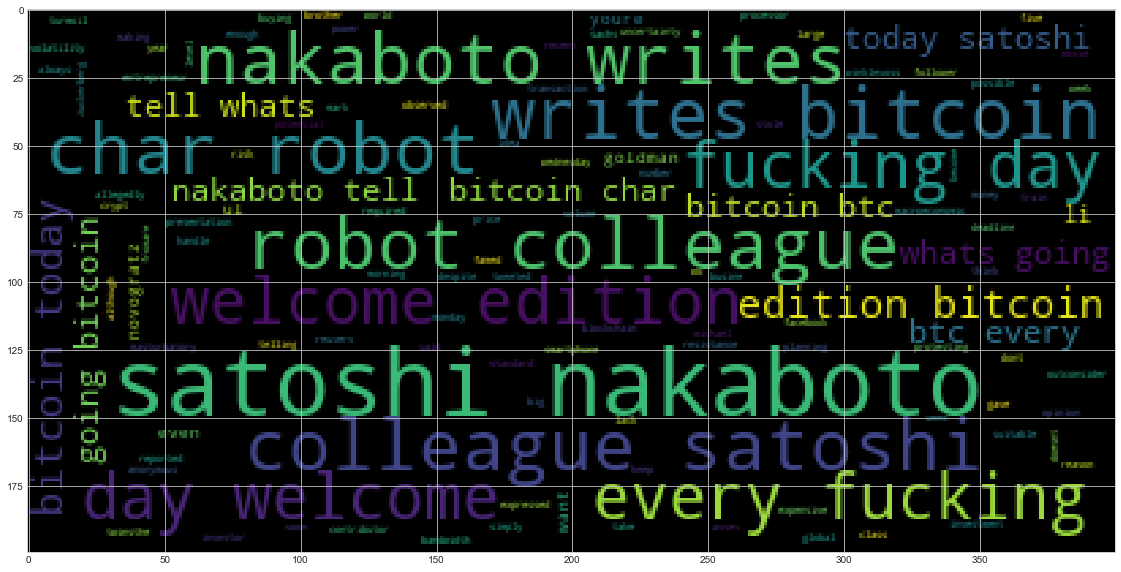

In [338]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(all_tokens_bitcoin))
plt.imshow(wc)

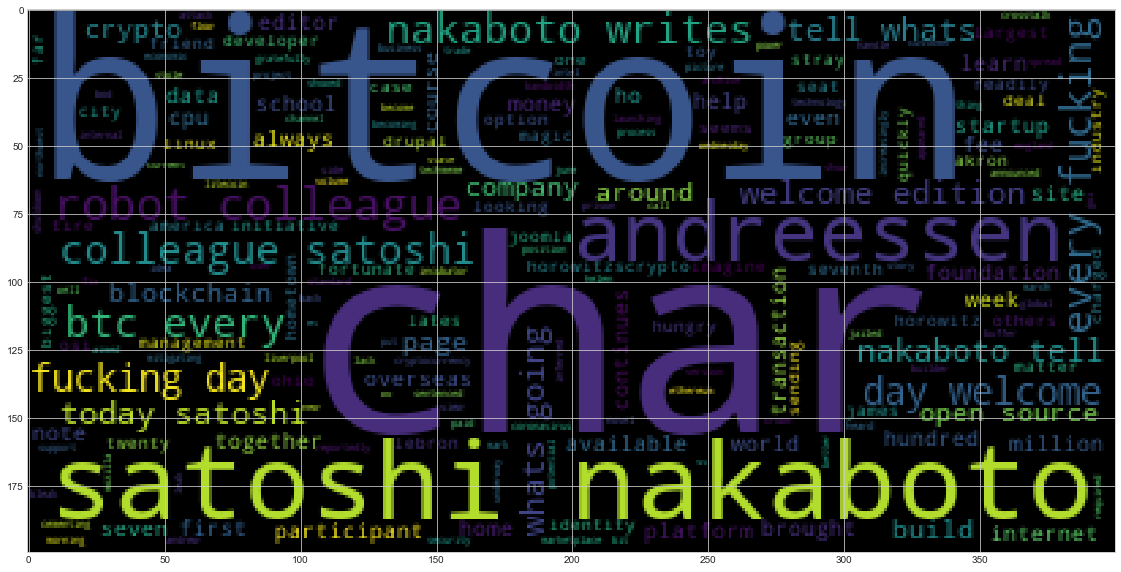

In [339]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(all_tokens_eth))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [340]:
import spacy
from spacy import displacy

In [341]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [342]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [343]:
# Concatenate all of the bitcoin text together
btc_all_text = ' '.join(list(bitcoin_df['text']))

In [344]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_all_text)
# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER'


In [345]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [346]:
# List all Entities
for entity in btc_doc.ents:
    print(entity.text,entity.label_)

Mark Zuckerberg PERSON
Facebook ORG
Deadline PERSON
this week DATE
+2657 ORG
Reuters
 ORG
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
2020 DATE
a big year DATE
Bitcoin GPE
Bitcoin GPE
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto P

---

## Ethereum NER

In [347]:
# Concatenate all of the bitcoin text together
eth_all_text = ' '.join(list(ethereum_df['text']))

In [348]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_all_text)
# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'



In [349]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [350]:
# List all Entities
for entity in eth_doc.ents:
    print(entity.text,entity.label_)

Andreessen HorowitzsCrypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
+3009 ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Andreessen Horowitzs ORG
Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Akron GPE
Ohio GPE
LeBron James PERSON
US GPE
the one hundred and twenty seventh DATE
US GPE
America GPE
first ORDINAL
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
133 MONEY
$2.5 million MONEY
$2.5 million MONEY
Wednesday DATE
morning TIME
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
more than £30,000 CARDINAL
Bitcoin GPE
Litecoin and Ethereum ORG
Mark Andrews PERSON
St Helens PERSON
England GPE
Liverpool Crown C ORG
+2411 ORG
Intel ORG
CrossTalk ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PE